First 5 rows of the dataset:
                  Date  Sales  Profit  Discount Region
0  2021-04-13 00:00:00    228     470      0.42  South
1  2022-03-12 00:00:00    747     242      0.34   West
2  2021-09-28 00:00:00    571     268      0.37  South
3  2021-04-17 00:00:00    162     368      0.10   West
4  2021-03-13 00:00:00    238     207      0.27   East

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      100 non-null    object 
 1   Sales     100 non-null    int64  
 2   Profit    100 non-null    int64  
 3   Discount  100 non-null    float64
 4   Region    100 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB
None

Missing Values in Dataset:
Date        0
Sales       0
Profit      0
Discount    0
Region      0
dtype: int64

Dataset Columns:
Index(['Date', 'Sales', 'Profit', 'Discount', 'Region'

C:\Users\Anandhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anandhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anandhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anandhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

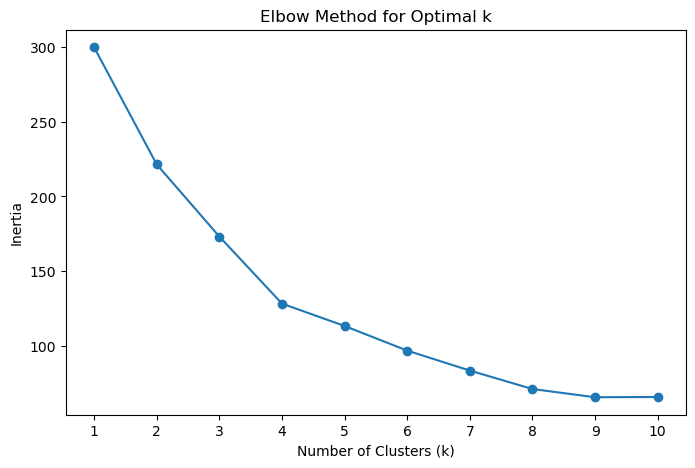

C:\Users\Anandhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



First 5 rows with cluster labels:
                  Date  Sales  Profit  Discount Region  Cluster
0  2021-04-13 00:00:00    228     470      0.42  South        1
1  2022-03-12 00:00:00    747     242      0.34   West        0
2  2021-09-28 00:00:00    571     268      0.37  South        0
3  2021-04-17 00:00:00    162     368      0.10   West        2
4  2021-03-13 00:00:00    238     207      0.27   East        2


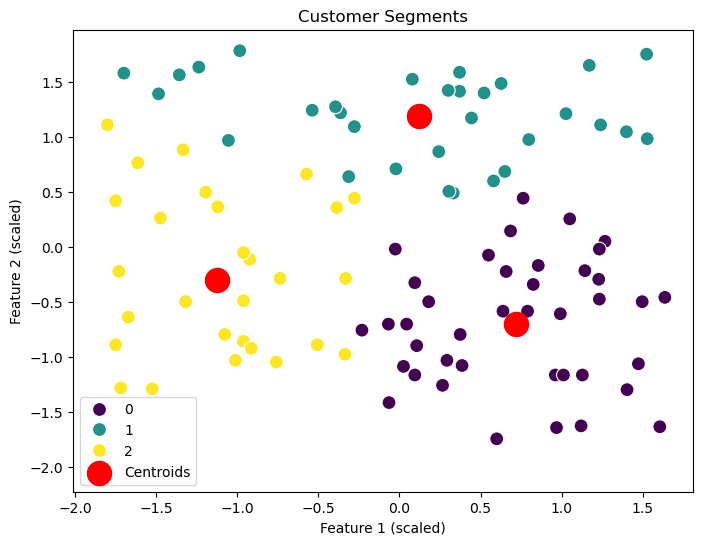

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\Anandhu\data science task3\sales_data.csv" 
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Display column names
print("\nDataset Columns:")
print(df.columns)

# Select numeric columns for clustering
features = df[['Sales', 'Profit', 'Discount']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first few rows of the standardized data
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

# Perform K-Means clustering with the optimal k (from the elbow method, assume k=3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())

# Visualize clusters (using the first two features for plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=cluster_labels,
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids'
)
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()